In this notebook, we will try to detect a coin from an image using dlib. Let's import necessary modules

In [21]:
import glob, os, dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

I've selected 15 images randomly and annotated them using Imglab. That annotation file can be found here https://gist.github.com/qmaruf/f6740ff448dfcea5227fb0f8f4cad0c5

In [22]:
# annotation images and xml file
annotation_folder = '/media/maruf/resource2/kaggle/brazilian_coin/annotations/'
# rest of the images for testing
coins = glob.glob('/media/maruf/resource2/kaggle/brazilian_coin/all/*.jpg')

In [23]:
# necessary settings for dlib, taken from dlib site.
options = dlib.simple_object_detector_training_options()
options.add_left_right_image_flips = True
options.C = 5
options.num_threads = 4
options.be_verbose = True
training_xml_path = os.path.join(annotation_folder, "training.xml")

In [24]:
# training
dlib.train_simple_object_detector(training_xml_path, "detector.svm", options)
# loading detector
detector = dlib.simple_object_detector("detector.svm")

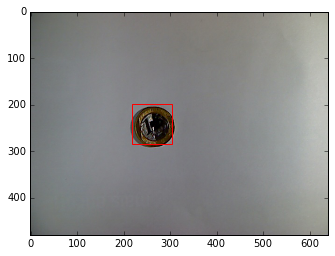

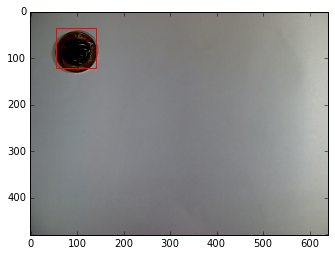

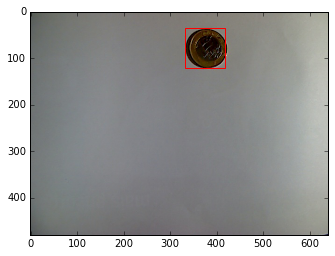

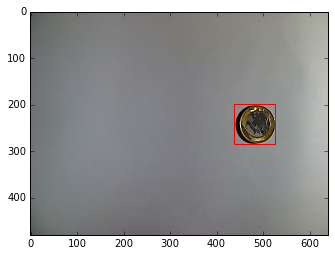

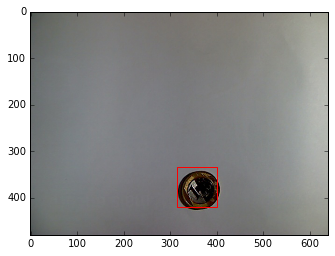

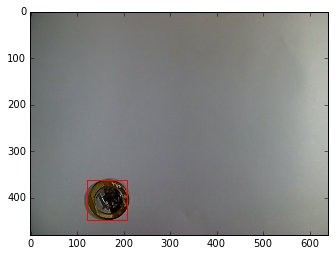

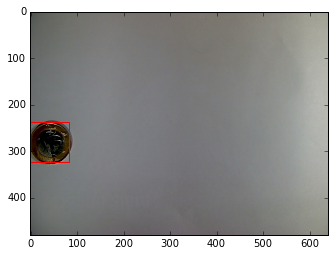

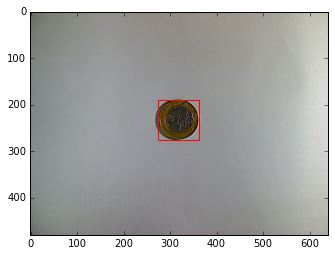

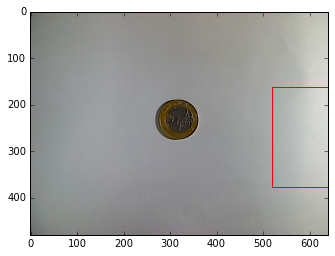

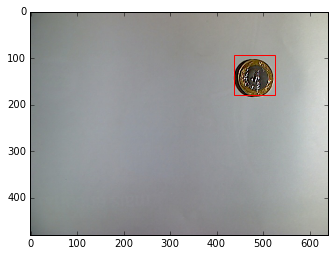

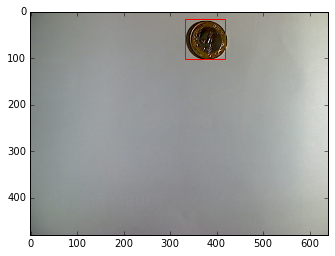

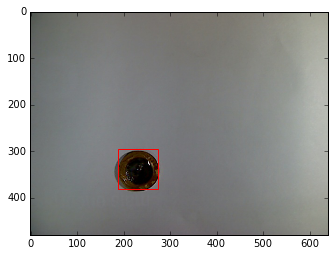

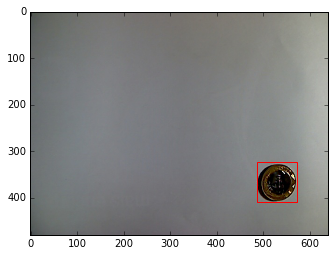

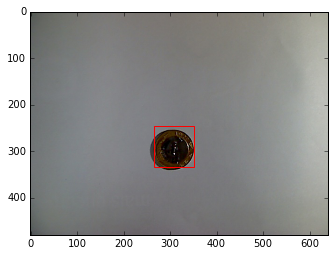

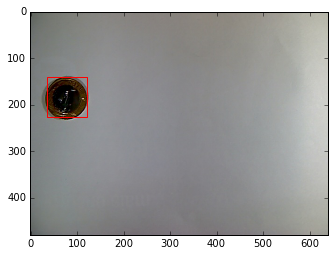

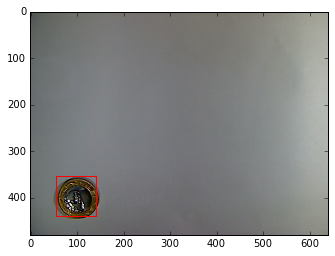

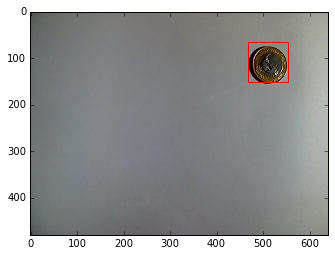

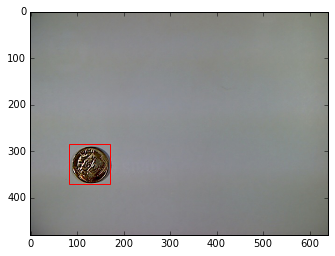

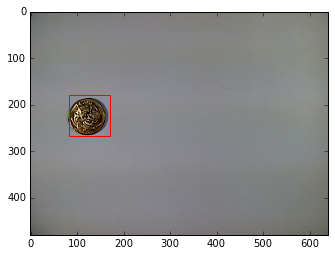

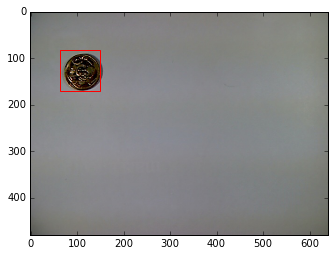

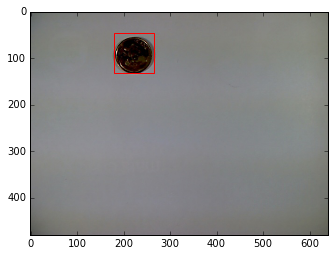

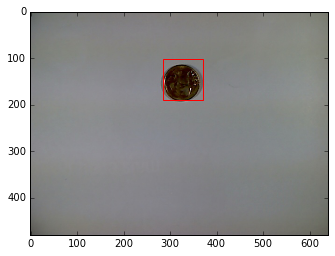

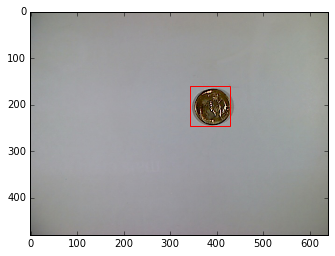

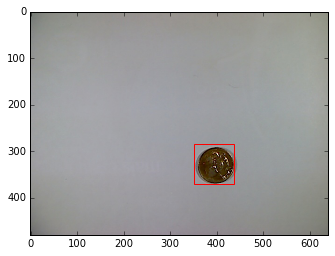

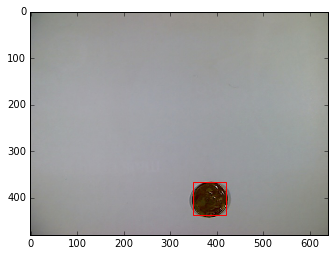

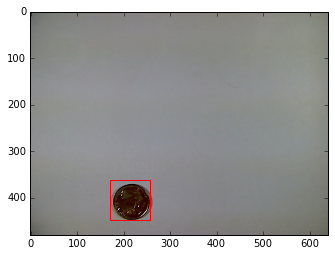

In [25]:
# localization
for n, coin in enumerate(coins[:25]):    
    img = plt.imread(coin)
    dets = detector(img)    
    for k, d in enumerate(dets):
        left = d.left()
        top = d.top()
        width = d.right() - d.left()
        height = d.bottom() - d.top()        
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        rect = patches.Rectangle((left, top),width, height,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)        
        plt.show()
        plt.figure(n)

As we can see, coin localization is not 100% accurate. May be we should increase training size. For classification purpose we need to localize and annotate these coins. We can use dlib to localize the quickly and create the annotation based on file name.